In [89]:
import pandas as pd
import datetime as dt
import numpy as np

In [90]:
orders = pd.read_excel('Dataset.xlsx')
orders

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135


In [91]:
returned = pd.read_excel('Dataset.xlsx', sheet_name='Return')
returned

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


In [92]:
# merge the two tables on the Order ID field
merged_df = pd.merge(orders, returned, on='Order ID', how='left')
# Remove customers in table Orders with Return = Yes in table Return
merged_df = merged_df[merged_df['Returned'] != 'Yes']


In [114]:
merged_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,NaN
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,NaN
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,NaN
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,NaN


In [131]:
# prepare suitable data for the RFM model
rfm_df = merged_df.groupby('Customer ID').agg({
    'Order Date': lambda x: (pd.to_datetime('2017-12-31') - pd.to_datetime(x.max())).days,
    'Order ID': 'count',
    'Sales': 'sum'
}).reset_index()
# rename columns
rfm_df.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

In [130]:
rfm_df

,Customer ID,Recency,Frequency,Monetary,R,F,M,R-score,F-score,M-score,RFM Score
0,AA-10315,185,11,5563.560,3,2,4,2,3,5,235
1,AA-10375,20,15,1056.390,0,3,1,5,4,2,542
2,AA-10480,260,12,1790.512,3,2,2,2,3,3,233
3,AA-10645,483,17,5073.975,4,4,4,1,5,5,155
4,AB-10015,416,6,886.156,4,0,1,1,1,2,112
...,...,...,...,...,...,...,...,...,...,...,...
786,XP-21865,83,25,2110.726,2,4,2,3,5,3,353
787,YC-21895,5,7,5438.650,0,0,4,5,1,5,515
788,YS-21880,10,12,6720.444,0,2,4,5,3,5,535
789,ZC-21910,55,27,7892.998,1,4,4,4,5,5,455


In [132]:
#Calculate the R, F, M scores for each customer:
rfm_df['R'] = pd.qcut(rfm_df['Recency'], q=5, labels=False)
rfm_df['F'] = pd.qcut(rfm_df['Frequency'], q=5, labels=False)
rfm_df['M'] = pd.qcut(rfm_df['Monetary'], q=5, labels=False)
#Calculate the R-score, F-score, and M-score (using qcut()) and merge the 3 indices:
rfm_df['R-score'] = 5 - rfm_df['R']
rfm_df['F-score'] = rfm_df['F'] + 1
rfm_df['M-score'] = rfm_df['M'] + 1
rfm_df['RFM Score'] = rfm_df['R-score'].map(str) + rfm_df['F-score'].map(str) + rfm_df['M-score'].map(str)

In [133]:
#group customers based on the classification table with Segment 
segment_df = rfm_df.copy()
segment_df['Segment'] = ''
segment_df.loc[segment_df['RFM Score'].isin(['555', '554', '544', '545', '454', '455', '445']), 'Segment'] = 'Champions'
segment_df.loc[segment_df['RFM Score'].isin(['543', '444', '435', '355', '354', '345', '344', '335']), 'Segment'] = 'Loyal'
segment_df.loc[segment_df['RFM Score'].isin(['553', '551', '552', '541', '542', '533', '532', '531', '452', '451', '442', '441', '431', '453', '433', '432', '423', '353', '352', '351', '342', '341', '333', '323']), 'Segment'] = 'Potential Loyalist'
segment_df.loc[segment_df['RFM Score'].isin(['512', '511', '422', '421', '412', '411', '311']), 'Segment'] = 'New Customers'
segment_df.loc[segment_df['RFM Score'].isin(['525', '524', '523', '522', '521', '515', '514', '513', '425', '424', '413', '414', '415', '315', '314', '313']), 'Segment'] = 'Promising'
segment_df.loc[segment_df['RFM Score'].isin(['535', '534', '443', '434', '343', '334', '325', '324']), 'Segment'] = 'Need Attention'
segment_df.loc[segment_df['RFM Score'].isin(['331', '321', '312', '221', '213', '231', '241', '251']), 'Segment'] = 'About To Sleep'
segment_df.loc[segment_df['RFM Score'].isin(['255', '254', '245', '244', '253', '252', '243', '242', '235', '234', '225', '224', '153', '152', '145', '143', '142', '135', '134', '133', '125', '124']), 'Segment'] = 'At Risk'
segment_df.loc[segment_df['RFM Score'].isin(['155', '154', '144', '214', '215', '115', '114', '113']), 'Segment'] = 'Cannot Lose Them'
segment_df.loc[segment_df['RFM Score'].isin(['332', '322', '233', '232', '223', '222', '132', '123', '122','212','211']), 'Segment'] = 'Hibernating customers'
segment_df.loc[segment_df['RFM Score'].isin(['111', '112', '121', '131', '141', '151']), 'Segment'] = 'Lost customers'

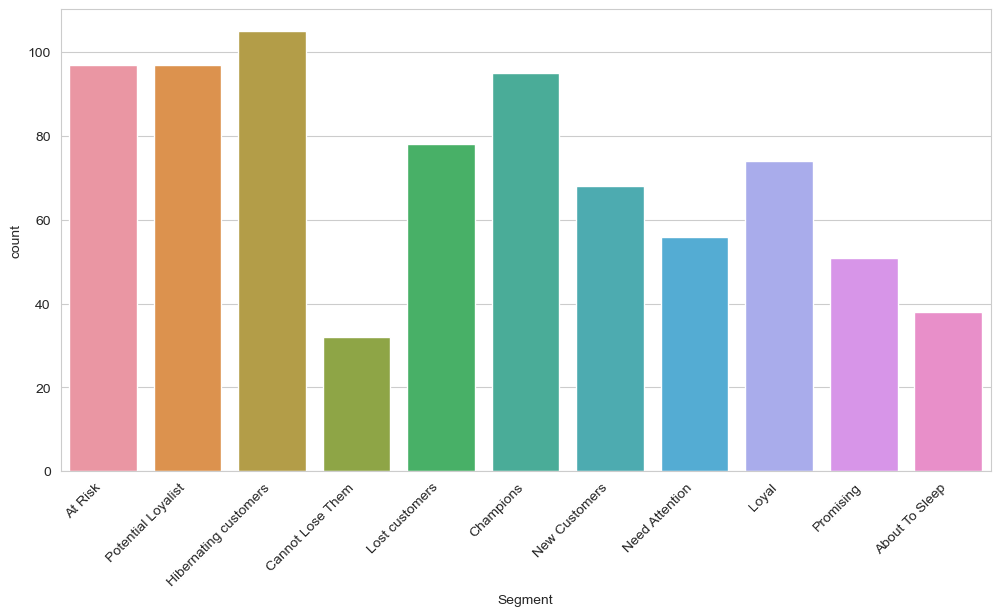

In [134]:
# Visualize the number of customers in each segment
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.countplot(x='Segment', data=segment_df)
plt.xticks(rotation=45, ha='right')
plt.show()

In [126]:
segment_df

,Customer ID,Recency,Frequency,Monetary,R,F,M,R-score,F-score,M-score,RFM Score,Segment
0,AA-10315,185,11,5563.560,3,2,4,2,3,5,235,At Risk
1,AA-10375,20,15,1056.390,0,3,1,5,4,2,542,Potential Loyalist
2,AA-10480,260,12,1790.512,3,2,2,2,3,3,233,Hibernating customers
3,AA-10645,483,17,5073.975,4,4,4,1,5,5,155,Cannot Lose Them
4,AB-10015,416,6,886.156,4,0,1,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...,...,...,...
786,XP-21865,83,25,2110.726,2,4,2,3,5,3,353,Potential Loyalist
787,YC-21895,5,7,5438.650,0,0,4,5,1,5,515,Promising
788,YS-21880,10,12,6720.444,0,2,4,5,3,5,535,Need Attention
789,ZC-21910,55,27,7892.998,1,4,4,4,5,5,455,Champions


In [127]:
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  791 non-null    object 
 1   Recency      791 non-null    int64  
 2   Frequency    791 non-null    int64  
 3   Monetary     791 non-null    float64
 4   R            791 non-null    int64  
 5   F            791 non-null    int64  
 6   M            791 non-null    int64  
 7   R-score      791 non-null    int64  
 8   F-score      791 non-null    int64  
 9   M-score      791 non-null    int64  
 10  RFM Score    791 non-null    object 
 11  Segment      791 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 74.3+ KB


In [128]:
customers_by_segment = segment_df.groupby('Segment')['Customer ID'].count().reset_index()
customers_by_segment.columns = ['Segment', 'Number of Customers']
print(customers_by_segment)

                  Segment  Number of Customers
0          About To Sleep                   38
1                 At Risk                   97
2        Cannot Lose Them                   32
3               Champions                   95
4   Hibernating customers                  105
5          Lost customers                   78
6                   Loyal                   74
7          Need Attention                   56
8           New Customers                   68
9      Potential Loyalist                   97
10              Promising                   51


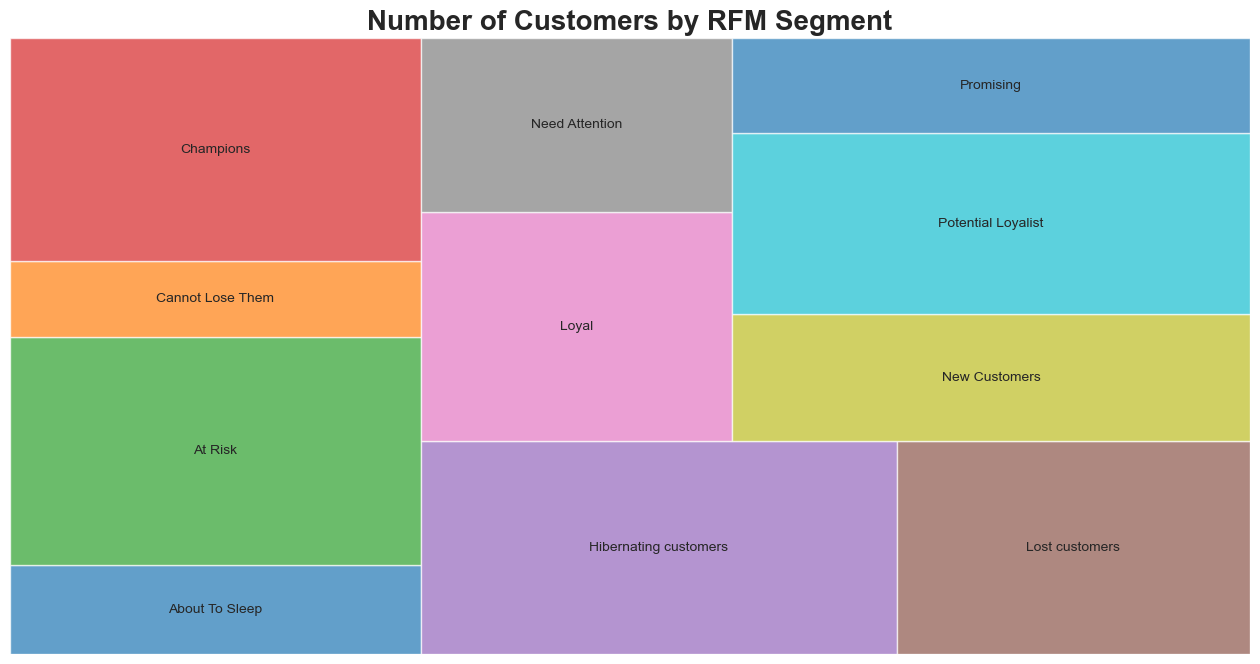

In [129]:
import matplotlib.pyplot as plt
import squarify

# Define the color scale for each segment
colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Group the segment_df by segment and count the number of customers
segment_counts = segment_df.groupby('Segment').size().reset_index(name='Count')

# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Plot the treemap
squarify.plot(sizes=segment_counts['Count'], label=segment_counts['Segment'], color=colors, alpha=0.7)

# Add title and axis labels
plt.title('Number of Customers by RFM Segment', fontsize=20, fontweight='bold')
plt.axis('off')

# Show the plot
plt.show()